# detecting license plate recognition on photos using mobilenetv2-ssd tflite model

In [1]:
import cv2
import numpy as np
import glob
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

In [2]:
names=glob.glob('./test/*.j*')
names

['./test/10914img1.jpg',
 './test/2252-200618-155742-0.jpg',
 './test/24da94u-960.jpg',
 './test/6564_img1.jpg',
 './test/6902.jpg',
 './test/a999aa777.jpg',
 './test/b293ec777.jpg',
 './test/b905736s-1920.jpg',
 './test/images (1).jpeg',
 './test/images (2).jpeg']

In [3]:
paths='../model2cr_nomer.tflite'
interpreter = tf.lite.Interpreter(model_path=paths)
interpreter.allocate_tensors()
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

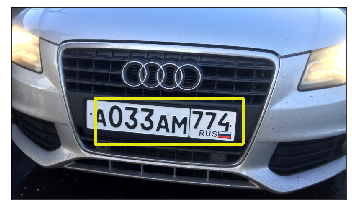

уверенность  0.5576611


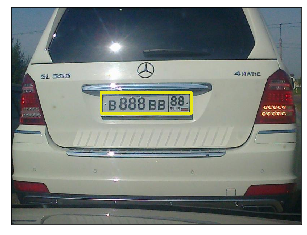

уверенность  0.82036257


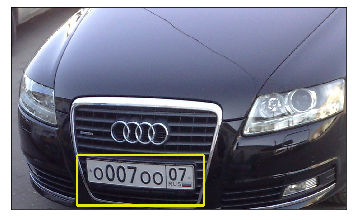

уверенность  0.45301366


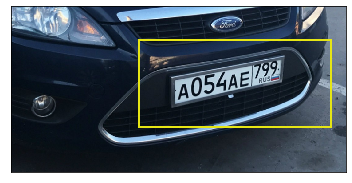

уверенность  0.25517905


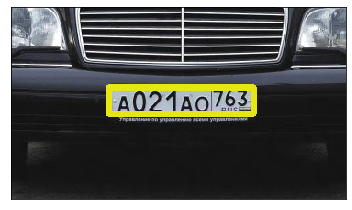

уверенность  0.7687875


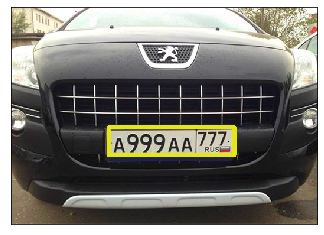

уверенность  0.28059158


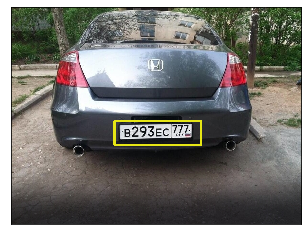

уверенность  0.19071883


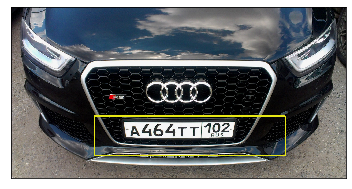

уверенность  0.19693464


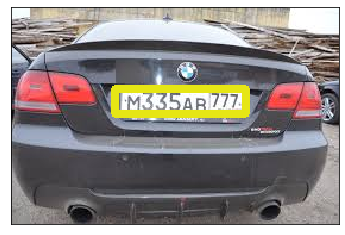

уверенность  0.83254164


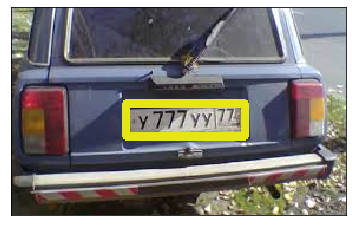

уверенность  0.60059696


In [4]:
for i in names:

    img_name1=i
    image0 = cv2.imread(img_name1,1)
    image_height, image_width, _ = image0.shape
    image = cv2.resize(image0, (300,300))
    image = image.astype(np.float32)
    X_data1=np.float32(image.reshape(1,300, 300,3))
    input_index = (interpreter.get_input_details()[0]['index'])
    interpreter.set_tensor(input_details[0]['index'], X_data1)
    interpreter.invoke()
    detection = interpreter.get_tensor(output_details[0]['index'])
    net_out_value2 = interpreter.get_tensor(output_details[1]['index'])
    net_out_value3 = interpreter.get_tensor(output_details[2]['index'])
    net_out_value4 = interpreter.get_tensor(output_details[3]['index'])
    box_x =int( detection[0,0,0] * image_height)
    box_y = int(detection[0,0,1] * image_width)
    box_width =int( detection[0,0,2] * image_height)
    box_height = int(detection[0,0,3] * image_width)
    
    img = image0
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
        
    cv2.rectangle(img2, ( box_y,box_x), (box_height,box_width ), (230, 230, 21), thickness=5)
       
    plt.imshow(img2)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    print('уверенность ',net_out_value3[0][0])